<a href="https://colab.research.google.com/github/boskidisanalysis/SUZY/blob/main/SUZY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUZY Dataset

 This is a classification problem to distinguish between a signal process which produces supersymmetric particles and a background process which does not.

**Source**:

Daniel Whiteson daniel '@' uci.edu, Assistant Professor, Physics & Astronomy, Univ. of California Irvine

**Data Set Information**:

The data has been produced using Monte Carlo simulations. The first 8 features are kinematic properties measured by the particle detectors in the accelerator. The last ten features are functions of the first 8 features; these are high-level features derived by physicists to help discriminate between the two classes. There is an interest in using deep learning methods to obviate the need for physicists to manually develop such features. Benchmark results using Bayesian Decision Trees from a standard physics package and 5-layer neural networks and the dropout algorithm are presented in the original paper. The last 500,000 examples are used as a test set about your data set.

**Attribute Information**:

The first column is the class label (1 for signal, 0 for background), followed by the 18 features (8 low-level features then 10 high-level features): lepton 1 pT, lepton 1 eta, lepton 1 phi, lepton 2 pT, lepton 2 eta, lepton 2 phi, missing energy magnitude, missing energy phi, MET_rel, axial MET, M_R, M_TR_2, R, MT2, S_R, M_Delta_R, dPhi_r_b, cos(theta_r1). For detailed information about each feature see the original paper.

**Relevant Papers**:

Baldi, P., P. Sadowski, and D. Whiteson. “Searching for Exotic Particles in High-energy Physics with Deep Learning.” Nature Communications 5 (July 2, 2014)


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
!wget -cq https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

In [ ]:
columns = ['target', 'lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

In [ ]:
low_level = ['lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi']
high_level = ['MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

In [ ]:
df = pd.read_csv('/content/SUSY.csv.gz', compression='gzip', header=None, nrows=1000000, names= columns)

In [ ]:
df.head()

,target,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,1000000.0,0.457925,0.498227,0.000000e+00,0.000000,0.000000,1.000000,1.000000
lepton 1 pT,1000000.0,1.000404,0.686732,2.555066e-01,0.562287,0.791416,1.205369,19.949631
lepton 1 eta,1000000.0,-0.000492,1.003179,-2.102919e+00,-0.757760,-0.000930,0.756853,2.101605
lepton 1 phi,1000000.0,-0.001826,1.001678,-1.734789e+00,-0.869599,-0.002545,0.865741,1.734839
lepton 2 pT,1000000.0,0.999187,0.654622,4.285881e-01,0.597135,0.799429,1.162328,26.110743
lepton 2 eta,1000000.0,0.000789,1.002710,-2.059306e+00,-0.767788,0.000505,0.769867,2.059721
lepton 2 phi,1000000.0,0.000422,1.001668,-1.734202e+00,-0.867474,0.000708,0.868643,1.734686
missing energy magnitude,1000000.0,1.000920,0.874766,7.088768e-04,0.478996,0.773880,1.207752,19.206709
missing energy phi,1000000.0,-0.000367,1.001465,-1.727112e+00,-0.867696,-0.009056,0.867531,1.740689
MET_rel,1000000.0,1.001583,0.889947,9.238942e-07,0.369289,0.803021,1.375473,19.242374


Target Balance Check

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


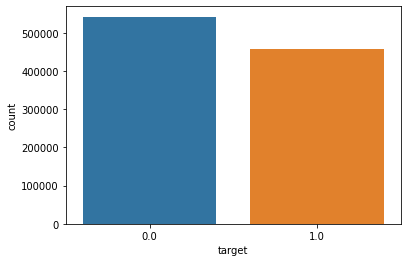

In [ ]:
sns.countplot(df.target)

In [ ]:
features = df.drop('target', axis=1)
target = df.target

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

In [ ]:
x_train_low = x_train.iloc[:,:8]
x_train_high = x_train.iloc[:,8:]
x_test_low = x_test.iloc[:,:8]
x_test_high = x_test.iloc[:,8:]

## Unsupervised Learning
###PCA 
We will perform dimensionality reduction using Principal Component Analysis in order to inspect whether the low-level features or high-level features explain  the variance of the data the most. 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_r = pca.fit(features).transform(features)

Text(0.5, 1.0, 'Full Dataset')

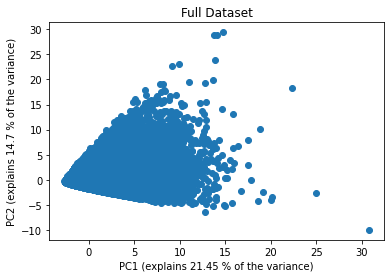

In [ ]:
plt.scatter(X_r[:,0], X_r[:,1])
plt.xlabel(f'PC1 (explains {round(pca.explained_variance_ratio_[0]*100,2)} % of the variance)')
plt.ylabel(f'PC2 (explains {round(pca.explained_variance_ratio_[1]*100,2)} % of the variance)')
plt.title('Full Dataset')

Text(0.5, 1.0, 'Full Dataset')

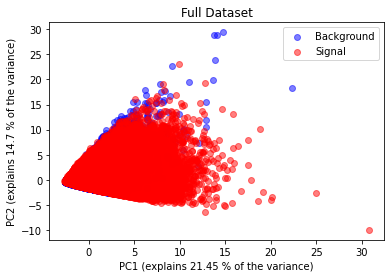

In [ ]:
colors = ['blue', 'red']
for i, color in zip([0,1], colors):
  plt.scatter(X_r[df.target==i, 0], X_r[df.target==i,1], color= color, alpha=0.5)
plt.xlabel(f'PC1 (explains {round(pca.explained_variance_ratio_[0]*100,2)} % of the variance)')
plt.ylabel(f'PC2 (explains {round(pca.explained_variance_ratio_[1]*100,2)} % of the variance)')
plt.legend(['Background', 'Signal'])
plt.title('Full Dataset')

In [ ]:
pca.explained_variance_ratio_

array([0.21451431, 0.14699142])

[0.21129312 0.19626583]


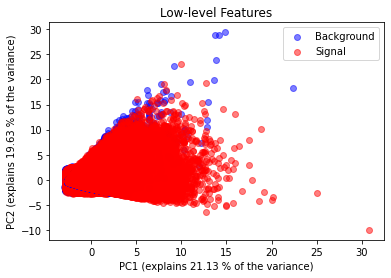

In [ ]:
pca = PCA(n_components=2)
X_r_low = pca.fit(features[low_level]).transform(features[low_level])

print(pca.explained_variance_ratio_)
colors = ['blue', 'red']
for i, color in zip([0,1], colors):
  plt.scatter(X_r_low[df.target==i, 0], X_r_low[df.target==i,1], color= color, alpha=0.5)
colors = ['blue', 'red']
for i, color in zip([0,1], colors):
  plt.scatter(X_r[df.target==i, 0], X_r[df.target==i,1], color= color, alpha=0.5)
plt.xlabel(f'PC1 (explains {round(pca.explained_variance_ratio_[0]*100,2)} % of the variance)')
plt.ylabel(f'PC2 (explains {round(pca.explained_variance_ratio_[1]*100,2)} % of the variance)')
plt.title('Low-level Features')
plt.legend(['Background', 'Signal'])

[0.45806813 0.21735891]


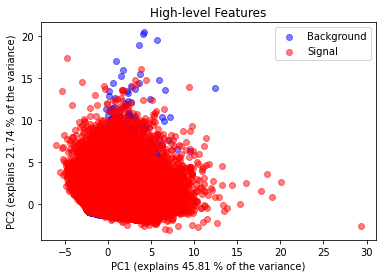

In [ ]:
pca = PCA(n_components=2)
X_r_high = pca.fit(features[high_level]).transform(features[high_level])

print(pca.explained_variance_ratio_)
colors = ['blue', 'red']
for i, color in zip([0,1], colors):
  plt.scatter(X_r_high[df.target==i, 0], X_r_high[df.target==i,1], color= color, alpha= 0.5)
plt.xlabel(f'PC1 (explains {round(pca.explained_variance_ratio_[0]*100,2)} % of the variance)')
plt.ylabel(f'PC2 (explains {round(pca.explained_variance_ratio_[1]*100,2)} % of the variance)')
plt.title('High-level Features')
plt.legend(['Background', 'Signal'])

Using high-level features we observe that the principal components explain more percent of the variance of the dataset than only using low-level or both combined. 

## Supervised Learning
We will perform various classification methods and compare their accuracies. As it was observed from Principal Component Analysis we can speculate that usage of high-level features will improve the accuracy of the models. So, we will compare the differences of the whole dataset, the low-level and high-level features. 



### Machine Learning Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr = LogisticRegression()
lgr.fit(features, df.target)
lgr.score(features,df.target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.788886

In [ ]:
lgr_low = LogisticRegression()
lgr_low.fit(x_train_low, y_train)
lgr_low.score(x_test_low, y_test)

0.76794

In [ ]:
lgr_high = LogisticRegression()
lgr_high.fit(x_train_high, y_train)
lgr_high.score(x_test_high, y_test)

0.76995

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
f_clas = f_classif(features, df.target)

In [ ]:
p_values = f_clas[1]

In [ ]:
p_values.T

array([0.00000000e+000, 8.04025945e-001, 8.96581909e-001, 0.00000000e+000,
       7.85294128e-001, 9.97878154e-001, 0.00000000e+000, 2.64635998e-001,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.43054973e-250, 0.00000000e+000])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(features, df.target)
clf.score(features, df.target)

0.999992

In [ ]:
clf_low = RandomForestClassifier(n_jobs=-1)
clf_low.fit(x_train_low, y_train)
clf_low.score(x_test_low, y_test)

0.78361

In [ ]:
clf_low_score = clf_low.score(x_test_low, y_test)

In [ ]:
clf_high = RandomForestClassifier(n_jobs=-1)
clf_high.fit(x_train_high, y_train)


RandomForestClassifier(n_jobs=-1)

In [ ]:
clf_high.score(x_test_high, y_test)

0.78747

In [ ]:
clf_high_score = clf_high.score(x_train_high, y_train)

In [ ]:
clf_high_preds = clf_high.predict(x_test_high)

In [ ]:
clf_low_preds = clf_low.predict(x_test_low)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print('**** Classification Report for High Level Features ****\n')
print(classification_report(y_test, y_pred=clf_high_preds, target_names=['background', 'signal'], digits=3))

**** Classification Report for High Level Features ****

              precision    recall  f1-score   support

  background      0.773     0.860     0.814     54194
      signal      0.809     0.701     0.751     45806

    accuracy                          0.787    100000
   macro avg      0.791     0.781     0.783    100000
weighted avg      0.790     0.787     0.786    100000



In [ ]:
print('**** Classification Report for Low Level Features ****\n')
print(classification_report(y_test, y_pred=clf_low_preds, target_names=['background', 'signal'], digits=3))

**** Classification Report for Low Level Features ****

              precision    recall  f1-score   support

  background      0.769     0.860     0.812     54194
      signal      0.807     0.694     0.746     45806

    accuracy                          0.784    100000
   macro avg      0.788     0.777     0.779    100000
weighted avg      0.786     0.784     0.782    100000



In [ ]:
#TODO
##Plot Feature Importances

### Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(x_train_high)

In [ ]:
model = keras.Sequential([
                          normalizer,
                          layers.Dense(32, 'relu'),
                          #layers.Dropout(0.5),
                          layers.Dense(32, 'relu'),
                          layers.Dense(32, 'relu'),
                          layers.Dense(32, 'relu'),
                          layers.Dense(1,'sigmoid')
                          

])

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss=keras.losses.BinaryCrossentropy(),
              metrics='accuracy')

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [ ]:
history_low = model.fit(x=x_train_high, y=y_train,
                        validation_split=0.2,
                        batch_size= 512 ,
                        epochs = 25,
                        callbacks = [callback])

Epoch 1/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4540 - accuracy: 0.7892 - val_loss: 0.4483 - val_accuracy: 0.7929
Epoch 2/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4480 - accuracy: 0.7923 - val_loss: 0.4453 - val_accuracy: 0.7931
Epoch 3/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4461 - accuracy: 0.7930 - val_loss: 0.4434 - val_accuracy: 0.7943
Epoch 4/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4450 - accuracy: 0.7933 - val_loss: 0.4460 - val_accuracy: 0.7933
Epoch 5/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4446 - accuracy: 0.7938 - val_loss: 0.4430 - val_accuracy: 0.7947
Epoch 6/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4439 - accuracy: 0.7941 - val_loss: 0.4452 - val_accuracy: 0.7936
Epoch 7/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4436 - accuracy: 0.7944 - val_loss: 0.4436 - val_accuracy:

In [ ]:
model.evaluate(x_test_high, y_test)

3125/3125 [==============================] - 6s 2ms/step - loss: 0.4440 - accuracy: 0.7935


[0.4439646601676941, 0.7935100197792053]

In [ ]:
model.predict(x_test_high[0:15])

array([[0.164873  ],
       [0.2275055 ],
       [0.41705924],
       [0.9029983 ],
       [0.29177928],
       [1.        ],
       [0.09811437],
       [0.14881495],
       [0.9798584 ],
       [0.15460047],
       [0.9642596 ],
       [0.37690505],
       [0.11467776],
       [0.12736684],
       [0.10815513]], dtype=float32)

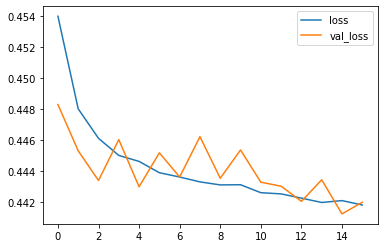

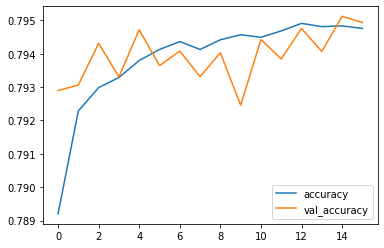

In [ ]:
history_df = pd.DataFrame(history_low.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
